## Histograma de una imagen

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histograma(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    (height, width) = image.shape
    hist = np.zeros(256, np.uint32)
    for i in range(width):
        for j in range(height):
            hist[image[i, j]] += 1
    return hist


if __name__ == '__main__':
    r = histograma("../Imagenes/boat.jpg")
    fig = plt.subplots(1, 1)
    plt.plot(r)
    plt.show()

## Ecualización del Histograma

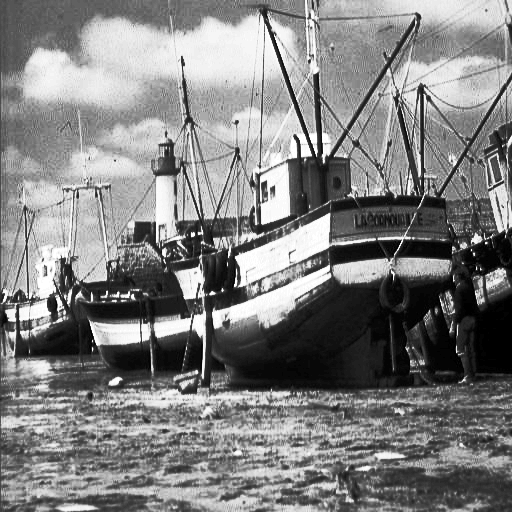

In [4]:
pkg load image
function imagenEcualizada = ecualizarImagen(img_path)
    img = imread(img_path);
    hist = obtenerHistograma(img);
    [m, n] = size(img);
    dist_acu = distribucionAcumulativa(hist, m, n);
    
    imagenEcualizada = zeros(m, n);
    img_double = double(img);
    
    for x = 1:m
        for y = 1:n
            imagenEcualizada(x, y) = round(dist_acu(img_double(x , y) + 1) * 255);
        endfor
    endfor

    imagenEcualizada = uint8(imagenEcualizada);
    
    
endfunction

function histograma = obtenerHistograma(img)
    histograma = zeros(256, 1);
    for i = 0:255
        histograma(i+1) = sum(sum(img == i));
    endfor
endfunction

function dist = distribucionAcumulativa(hist, m, n)

    dist = zeros(256, 1);
    for i = 0: 255
        dist(i + 1) = sum(hist(1:i+1)/(m*n));
    endfor

endfunction

img_final = ecualizarImagen('../Imagenes/boat.jpg');
imshow(img_final)

## Estiramiento del Histograma

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histograma(image):
    (height, width) = image.shape
    hist = np.zeros(256, np.uint32)
    for i in range(width):
        for j in range(height):
            hist[image[i, j]] += 1
    return hist

def estirarHistograma(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)



    rmin = np.min(image)
    rmax = np.max(image)

    result_image = (255/(rmax - rmin)) * (image - rmin)

    return (result_image, histograma(result_image.astype(int)))
if __name__ == '__main__':
    image = cv2.imread("../Imagenes/peppers.jpeg", cv2.IMREAD_GRAYSCALE)
    f = histograma(image)
    (image_final, r) = estirarHistograma("../Imagenes/peppers.jpeg")
    fig = plt.subplots(1, 1)
    #plt.bar(f, np.max(f)+ 10)
    plt.imshow(image_final, cmap='gray', vmin=0, vmax=255)
    plt.show()

## Reducción del Histograma

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histograma(image):
    (height, width) = image.shape
    hist = np.zeros(256, np.uint32)
    for i in range(width):
        for j in range(height):
            hist[image[i, j]] += 1
    return hist

def reducirHistograma(img_path, smin, smax):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    image = image.astype(float)

    rmin = np.min(image)
    rmax = np.max(image)

    if not (rmin < smin < rmax) or not (rmin < smax < rmax):
        return ([], [])

    result_image = ((smax - smin)/(rmax - rmin)) * (image - rmin) + smin

    return (result_image, histograma(result_image.astype(int)))
if __name__ == '__main__':
    image = cv2.imread("../Imagenes/peppers.jpeg", cv2.IMREAD_GRAYSCALE)
    f = histograma(image)
    (image_final, r) = reducirHistograma("../Imagenes/peppers.jpeg", 75, 127)
    fig = plt.subplots(1, 1)
    #plt.bar(f, np.max(f)+ 10)
    plt.imshow(image_final, cmap='gray', vmin=0, vmax=255)
    plt.show()

## Especificación del Histograma 

In [ ]:
pkg load image

function imagenEspecificada = especificacionHistograma(img_path_origen, img_path_especificada)

    img = imread(img_path_origen);
    [img_m, img_n] = size(img);
    
    img_especificada = imread(img_path_especificada);
    [especificada_m, especificada_n] = size(img_especificada);

    hist_img = obtenerHistograma(img);
    hist_especificada = obtenerHistograma(img_especificada);

    acu_img = distribucionAcumulativa(hist_img, img_m, img_n);
    acu_espe = distribucionAcumulativa(hist_especificada, especificada_m, especificada_n);

    imagenEspecificada = zeros(img_m, img_n);
    img_double = double(img);

    mapeo = zeros(256);

    for i = 1:256
        [value, index] = min(abs(acu_espe - acu_img(i)));
        mapeo(i) = index;
    endfor
    for x = 1:img_m
        for y = 1:img_n         
            imagenEspecificada(x, y) = round(mapeo(img_double(x, y) + 1));
        endfor
    endfor
    imagenEspecificada = uint8(imagenEspecificada);
endfunction


function dist = distribucionAcumulativa(hist, m, n)

    dist = zeros(256, 1);
    for i = 0: 255
        dist(i + 1) = sum(hist(1:i+1)/(m*n));
    endfor

endfunction

function histograma = obtenerHistograma(img)
    histograma = zeros(256, 1);
    for i = 0:255
        histograma(i+1) = sum(sum(img == i));
    endfor
endfunction


r = especificacionHistograma('../Imagenes/boat.jpg', '../Imagenes/peppers.jpeg');

imshow(r)